In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [2]:
ds = pd.read_csv('Dataset-Unicauca-Version2-87Atts.csv',nrows=5_000)

In [3]:
ds.drop(['Flow.ID','Bwd.PSH.Flags','Fwd.PSH.Flags','Fwd.URG.Flags','Bwd.URG.Flags','FIN.Flag.Count',
         'SYN.Flag.Count','RST.Flag.Count','PSH.Flag.Count','ACK.Flag.Count','URG.Flag.Count','CWE.Flag.Count','ECE.Flag.Count',
        'Fwd.Avg.Bytes.Bulk','Fwd.Avg.Packets.Bulk','Fwd.Avg.Bulk.Rate','Bwd.Avg.Bytes.Bulk','Bwd.Avg.Packets.Bulk','Bwd.Avg.Bulk.Rate'
        ],axis=1, inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
ds['ProtocolName'] = le.fit_transform(ds['ProtocolName'])
ds['Label'] = le.fit_transform(ds['Label'])
ds['Destination.IP'] = le.fit_transform(ds['Destination.IP'])
ds['Source.IP'] = le.fit_transform(ds['Source.IP'])
ds['Timestamp'] = le.fit_transform(ds['Timestamp'])  

In [6]:
X = ds.drop('L7Protocol', axis=1)  # Ознаки
y = ds['L7Protocol']  # Цільова змінна

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


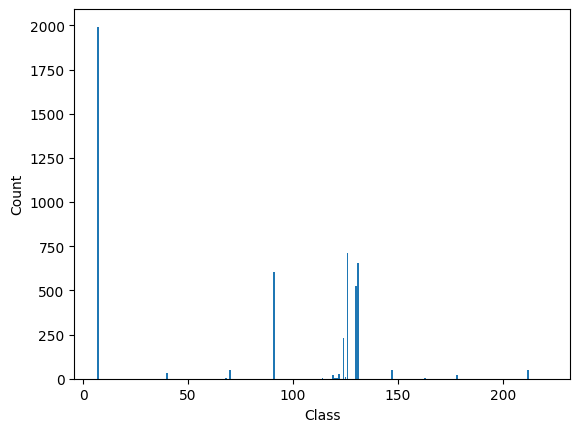

In [7]:
import matplotlib.pyplot as plt

class_counts = y.value_counts()

# Візуалізація збалансованості даних
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

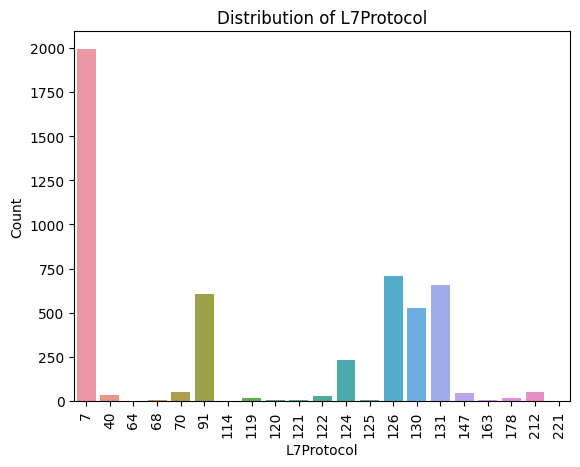

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

l7_protocol_counts = ds['L7Protocol'].value_counts()

sns.barplot(x=l7_protocol_counts.index, y=l7_protocol_counts.values)
plt.xlabel('L7Protocol')
plt.ylabel('Count')
plt.title('Distribution of L7Protocol')
plt.xticks(rotation=90)
plt.show()

In [9]:
from imblearn.under_sampling import RandomUnderSampler

X = ds.drop('L7Protocol', axis=1)
y = ds['L7Protocol']

# Використання випадкового підвищення
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Результати після випадкового підвищення
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)
print(resampled_data['L7Protocol'].value_counts())

# Використання збалансованого датасету для навчання моделі
# тут ви можете використовувати ваш алгоритм навчання моделі


L7Protocol
7      1
124    1
212    1
178    1
163    1
147    1
131    1
130    1
126    1
125    1
122    1
40     1
121    1
120    1
119    1
114    1
91     1
70     1
68     1
64     1
221    1
Name: count, dtype: int64


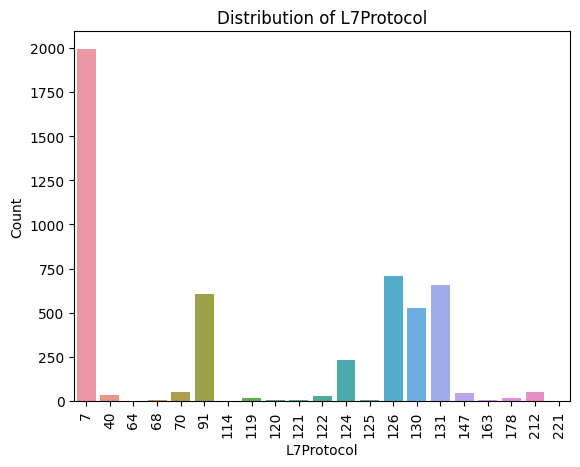

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

l7_protocol_counts = ds['L7Protocol'].value_counts()

sns.barplot(x=l7_protocol_counts.index, y=l7_protocol_counts.values)
plt.xlabel('L7Protocol')
plt.ylabel('Count')
plt.title('Distribution of L7Protocol')
plt.xticks(rotation=90)
plt.show()

In [11]:
y_column = 'L7Protocol' # target variable
X_columns = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.Size',
       'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1',
       'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 'Subflow.Bwd.Packets',
       'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min', 'Label',
       ]
X = ds[X_columns]
y = ds[y_column]

In [12]:
def creport(model):
    ypred = model.predict(X_test)
    return metrics.classification_report(y_test, ypred)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.91      0.95      0.93       608
          40       0.80      0.86      0.83        14
          64       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         1
          70       0.50      0.42      0.46        19
          91       0.89      0.83      0.86       174
         114       0.00      0.00      0.00         0
         119       0.80      1.00      0.89         4
         120       0.00      0.00      0.00         1
         121       1.00      1.00      1.00         1
         122       0.64      0.90      0.75        10
         124       0.72      0.48      0.57        65
         125       0.00      0.00      0.00         2
         126       0.75      0.83      0.79       205
         130       0.87      0.91      0.89       157
         131       0.77      0.72      0.74       195
         147       0.78      0.70      0.74        20
         163       0.00    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi